In [46]:
# Dependencies and Setup
%matplotlib inline
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

# Hide warning messages in notebook
import warnings
warnings.filterwarnings('ignore')

# File to Load (Remember to Change These)
mouse_drug_data_to_load = "data/mouse_drug_data.csv"
clinical_trial_data_to_load = "data/clinicaltrial_data.csv"

# Read the Mouse and Drug Data and the Clinical Trial Data
mouse = pd.read_csv(mouse_drug_data_to_load)
trial = pd.read_csv(clinical_trial_data_to_load)

# Combine the data into a single dataset

data = pd.merge(mouse , trial)

# Display the data table for preview
data.head()


,Mouse ID,Drug,Timepoint,Tumor Volume (mm3),Metastatic Sites
0,f234,Stelasyn,0,45.000000,0
1,f234,Stelasyn,5,47.313491,0
2,f234,Stelasyn,10,47.904324,0
3,f234,Stelasyn,15,48.735197,1
4,f234,Stelasyn,20,51.112713,2


## Tumor Response to Treatment

In [47]:
# Store the Mean Tumor Volume Data Grouped by Drug and Timepoint 
resp_treat = data.groupby(['Drug','Timepoint']).mean()
# Convert to DataFrame
resp_treat = pd.DataFrame(resp_treat)
# Preview DataFrame
resp_treat.reset_index(inplace=True)
resp_treat = resp_treat[['Drug','Timepoint','Tumor Volume (mm3)']]
resp_treat


,Drug,Timepoint,Tumor Volume (mm3)
0,Capomulin,0,45.000000
1,Capomulin,5,44.266086
2,Capomulin,10,43.084291
3,Capomulin,15,42.064317
4,Capomulin,20,40.716325
5,Capomulin,25,39.939528
6,Capomulin,30,38.769339
7,Capomulin,35,37.816839
8,Capomulin,40,36.958001
9,Capomulin,45,36.236114


In [48]:
# Store the Standard Error of Tumor Volumes Grouped by Drug and Timepoint
resp_treat_sem = data.groupby(['Drug','Timepoint']).sem()
# Convert to DataFrame
resp_treat_sem = pd.DataFrame(resp_treat_sem)
# Preview DataFrame
resp_treat_sem.reset_index(inplace=True)
resp_treat_sem = resp_treat_sem[['Drug','Timepoint','Tumor Volume (mm3)']]
resp_treat_sem.head()

,Drug,Timepoint,Tumor Volume (mm3)
0,Capomulin,0,0.000000
1,Capomulin,5,0.448593
2,Capomulin,10,0.702684
3,Capomulin,15,0.838617
4,Capomulin,20,0.909731


In [49]:
# Minor Data Munging to Re-Format the Data Frames
ref_data_volume = resp_treat.pivot('Timepoint','Drug' , 'Tumor Volume (mm3)')
# Preview that Reformatting worked
ref_data_volume.head()

Drug,Capomulin,Ceftamin,Infubinol,Ketapril,Naftisol,Placebo,Propriva,Ramicane,Stelasyn,Zoniferol
Timepoint,,,,,,,,,,
0,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000
5,44.266086,46.503051,47.062001,47.389175,46.796098,47.125589,47.248967,43.944859,47.527452,46.851818
10,43.084291,48.285125,49.403909,49.582269,48.694210,49.423329,49.101541,42.531957,49.463844,48.689881
15,42.064317,50.094055,51.296397,52.399974,50.933018,51.359742,51.067318,41.495061,51.529409,50.779059
20,40.716325,52.157049,53.197691,54.920935,53.644087,54.364417,53.346737,40.238325,54.067395,53.170334


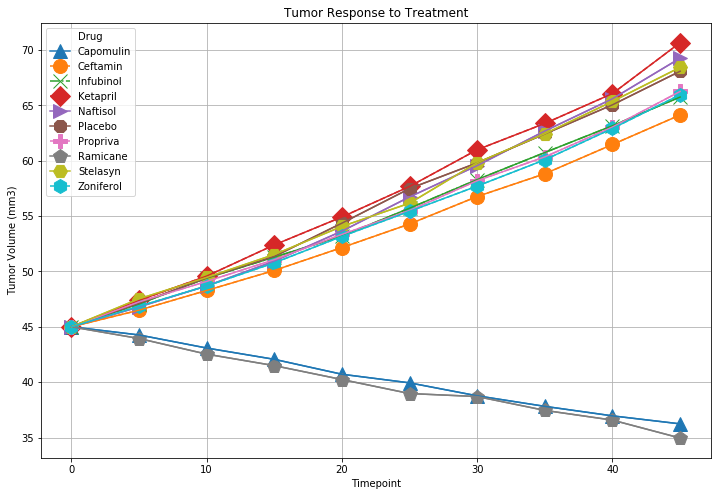

In [50]:
# Generate the Plot (with Error Bars)
df = ref_data_volume
errors = resp_treat_sem
#plot error bars
ax = df.plot(figsize=(12,8), yerr = errors, legend = False)
#reset color cycle so that the marker colors match
ax.set_prop_cycle(None)
plt.title("Tumor Response to Treatment")
plt.xlabel("Time (Days)")
plt.ylabel("Tumor Volume (mm3)")
#plot the markers

df.plot(figsize=(12,8), style=['^-', 'o--', 'x-.', 'D--','>-', '8-', 'P-.', 'p-','H-', 'h--'], markersize=14, ax = ax)
plt.grid()
plt.savefig("Tumor Response to Treatment.png")
plt.show()


## Metastatic Response to Treatment

In [51]:
# Store the Mean Met. Site Data Grouped by Drug and Timepoint 
met_res = data.groupby(['Drug','Timepoint']).mean()
# Convert to DataFrame
met_res = pd.DataFrame(met_res)
met_res.reset_index(inplace = True)
met_res = met_res[['Drug','Timepoint', 'Metastatic Sites']]
# Preview DataFrame
met_res.head()


,Drug,Timepoint,Metastatic Sites
0,Capomulin,0,0.000000
1,Capomulin,5,0.160000
2,Capomulin,10,0.320000
3,Capomulin,15,0.375000
4,Capomulin,20,0.652174


In [52]:
# Store the Standard Error associated with Met. Sites Grouped by Drug and Timepoint 
met_stderr = data.groupby(['Drug','Timepoint']).sem()
# Convert to DataFrame
met_stderr = pd.DataFrame(met_stderr)
met_stderr.reset_index(inplace = True)
met_stderr = met_stderr[['Drug','Timepoint','Metastatic Sites']]
# Preview DataFrame
met_stderr.head()


,Drug,Timepoint,Metastatic Sites
0,Capomulin,0,0.000000
1,Capomulin,5,0.074833
2,Capomulin,10,0.125433
3,Capomulin,15,0.132048
4,Capomulin,20,0.161621


In [53]:
met_res.head()

,Drug,Timepoint,Metastatic Sites
0,Capomulin,0,0.000000
1,Capomulin,5,0.160000
2,Capomulin,10,0.320000
3,Capomulin,15,0.375000
4,Capomulin,20,0.652174


In [54]:
# Minor Data Munging to Re-Format the Data Frames
ref_data = met_res.pivot('Timepoint','Drug' ,  'Metastatic Sites')
# Preview that Reformatting worked
ref_data.head()

Drug,Capomulin,Ceftamin,Infubinol,Ketapril,Naftisol,Placebo,Propriva,Ramicane,Stelasyn,Zoniferol
Timepoint,,,,,,,,,,
0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
5,0.160000,0.380952,0.280000,0.304348,0.260870,0.375000,0.320000,0.120000,0.240000,0.166667
10,0.320000,0.600000,0.666667,0.590909,0.523810,0.833333,0.565217,0.250000,0.478261,0.500000
15,0.375000,0.789474,0.904762,0.842105,0.857143,1.250000,0.764706,0.333333,0.782609,0.809524
20,0.652174,1.111111,1.050000,1.210526,1.150000,1.526316,1.000000,0.347826,0.952381,1.294118


In [55]:
# Minor Data Munging to Re-Format the Data Frames

met_stderr = met_stderr.pivot('Timepoint','Drug' , 'Metastatic Sites')
# Preview that Reformatting worked
met_stderr.head()

Drug,Capomulin,Ceftamin,Infubinol,Ketapril,Naftisol,Placebo,Propriva,Ramicane,Stelasyn,Zoniferol
Timepoint,,,,,,,,,,
0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
5,0.074833,0.108588,0.091652,0.098100,0.093618,0.100947,0.095219,0.066332,0.087178,0.077709
10,0.125433,0.152177,0.159364,0.142018,0.163577,0.115261,0.105690,0.090289,0.123672,0.109109
15,0.132048,0.180625,0.194015,0.191381,0.158651,0.190221,0.136377,0.115261,0.153439,0.111677
20,0.161621,0.241034,0.234801,0.236680,0.181731,0.234064,0.171499,0.119430,0.200905,0.166378


<Figure size 864x576 with 0 Axes>

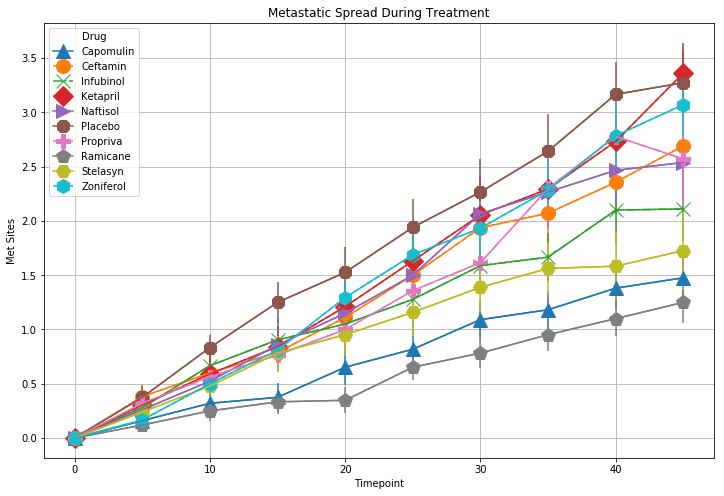

In [56]:
# Generate the Plot (with Error Bars)
df = ref_data
errors = met_stderr 
plt.figure(figsize=[12,8])
#plot error bars
ax = df.plot(figsize=(12,8), yerr = errors, legend = False)
#reset color cycle so that the marker colors match
ax.set_prop_cycle(None)
plt.title("Metastatic Spread During Treatment")
plt.xlabel("Time (Days)")
plt.ylabel("Met Sites")
#plot the markers

df.plot(figsize=(12,8), style=['^-', 'o--', 'x-.', 'D--','>-', '8-', 'P-.', 'p-','H-', 'h--'], markersize=14, ax = ax)
plt.grid()
plt.savefig("Metastatic Spread During Treatment.png")
plt.show()


## Survival Rates

In [57]:
# Store the Count of Mice Grouped by Drug and Timepoint (W can pass any metric)
mouse_count = data.groupby(['Drug','Timepoint']).count()
mouse_count = mouse_count[['Mouse ID']]
mouse_count = mouse_count.rename(columns={"Mouse ID":"Mouse Count"})
# Convert to DataFrame
mouse_count = pd.DataFrame(mouse_count)
mouse_count.reset_index(inplace=True)
# Preview DataFrame
mouse_count.head()


,Drug,Timepoint,Mouse Count
0,Capomulin,0,25
1,Capomulin,5,25
2,Capomulin,10,25
3,Capomulin,15,24
4,Capomulin,20,23


In [58]:
# Minor Data Munging to Re-Format the Data Frames
count_data = mouse_count.pivot('Timepoint','Drug' , 'Mouse Count')
# Preview that Reformatting worked
count_data.head()

Drug,Capomulin,Ceftamin,Infubinol,Ketapril,Naftisol,Placebo,Propriva,Ramicane,Stelasyn,Zoniferol
Timepoint,,,,,,,,,,
0,25,25,25,25,25,25,26,25,26,25
5,25,21,25,23,23,24,25,25,25,24
10,25,20,21,22,21,24,23,24,23,22
15,24,19,21,19,21,20,17,24,23,21
20,23,18,20,19,20,19,17,23,21,17


In [59]:
for col in count_data.columns:
    count_data[col] = count_data[col]/max(count_data[col])*100


<Figure size 864x576 with 0 Axes>

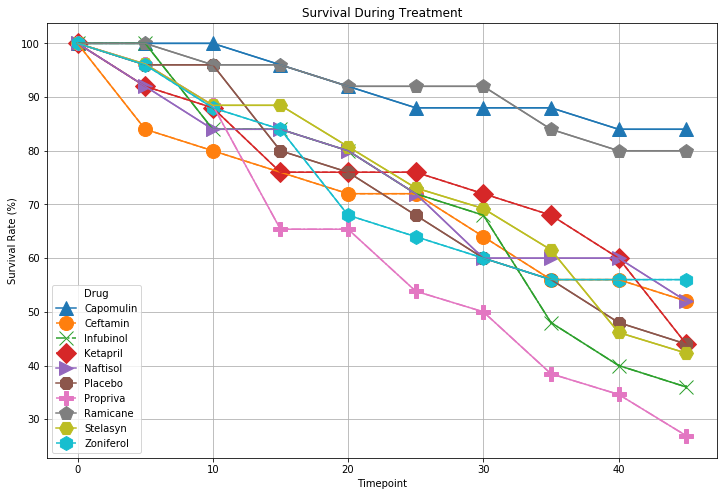

In [60]:
# Generate the Plot (Accounting for percentages)

df = count_data
plt.figure(figsize=[12,8])
#plot error bars
ax = df.plot(figsize=(12,8), yerr = errors, legend = False)
#reset color cycle so that the marker colors match
ax.set_prop_cycle(None)
plt.title("Survival During Treatment")
plt.xlabel("Time (Days)")
plt.ylabel("Survival Rate (%)")
#plot the markers

df.plot(figsize=(12,8), style=['^-', 'o--', 'x-.', 'D--','>-', '8-', 'P-.', 'p-','H-', 'h--'], markersize=14, ax = ax)
plt.grid()
plt.savefig("Survival During Treatment.png")
plt.show()


## Summary Bar Graph

In [61]:
ref_data_volume

Drug,Capomulin,Ceftamin,Infubinol,Ketapril,Naftisol,Placebo,Propriva,Ramicane,Stelasyn,Zoniferol
Timepoint,,,,,,,,,,
0,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000
5,44.266086,46.503051,47.062001,47.389175,46.796098,47.125589,47.248967,43.944859,47.527452,46.851818
10,43.084291,48.285125,49.403909,49.582269,48.694210,49.423329,49.101541,42.531957,49.463844,48.689881
15,42.064317,50.094055,51.296397,52.399974,50.933018,51.359742,51.067318,41.495061,51.529409,50.779059
20,40.716325,52.157049,53.197691,54.920935,53.644087,54.364417,53.346737,40.238325,54.067395,53.170334
25,39.939528,54.287674,55.715252,57.678982,56.731968,57.482574,55.504138,38.974300,56.166123,55.432935
30,38.769339,56.769517,58.299397,60.994507,59.559509,59.809063,58.196374,38.703137,59.826738,57.713531
35,37.816839,58.827548,60.742461,63.371686,62.685087,62.420615,60.350199,37.451996,62.440699,60.089372
40,36.958001,61.467895,63.162824,66.068580,65.600754,65.052675,63.045537,36.574081,65.356386,62.916692


In [62]:
# Calculate the percent changes for each drug
# Display the data to confirm

changes = {}
for col in ref_data_volume.columns:
    change = round(( ref_data_volume.loc[45,col] -ref_data_volume.loc[0,col])/ref_data_volume.loc[0,col]*100, 6)
    changes[col] = change
    print(col,change)


Capomulin -19.475303
Ceftamin 42.516492
Infubinol 46.123472
Ketapril 57.028795
Naftisol 53.923347
Placebo 51.29796
Propriva 47.241175
Ramicane -22.3209
Stelasyn 52.085134
Zoniferol 46.579751


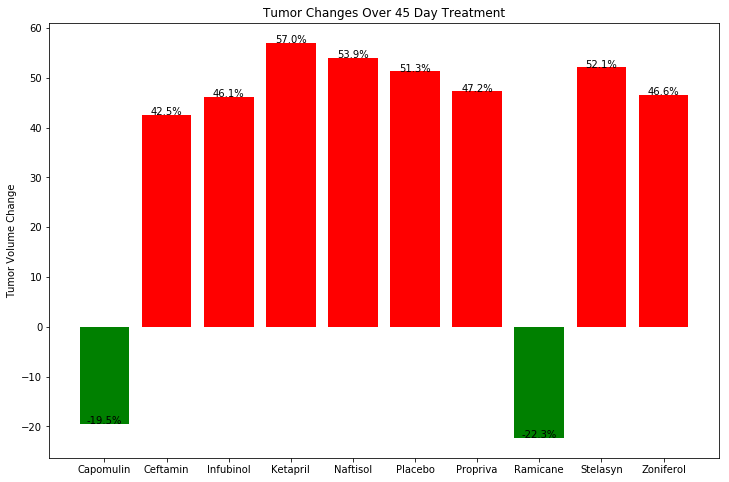

In [63]:

# Store all Relevant Percent Changes into a Tuple
changes_df = pd.DataFrame(list(changes.items()), columns=['Drug','Change'])
changes_df.index = changes_df.Drug
# Splice the data between passing and failing drugs
changes_df['pass_fail'] = np.where(changes_df.Change > 0, "Pass","Fail")

# Orient widths. Add labels, tick marks, etc. 
plt.figure(figsize=[12,8])

plt.bar(x =changes_df["Drug"], height = changes_df["Change"],
       color=changes_df.pass_fail.map({"Pass": 'red', "Fail": 'green'}))
# Use functions to label the percentages of changes

# Make some labels.
labels = ["%1.1f%%" % i for i in changes_df.Change]

# Create annotation
for i in range(len(labels)):
    
    plt.annotate(labels[i], xy = [changes_df.Drug[i], changes_df.Change[i]], ha = "center")
    
plt.title("Tumor Changes Over 45 Day Treatment")
plt.ylabel("Tumor Volume Change")
# Save the Figure

plt.savefig("Tumor Changes Over 45 Day Treatment.png")

# Written description of three observable trends based on the data

* From the data and graph of "Tumor Response to treatment" we can see that all tumors size were increasing except the Capomulin and Ramicane medicine group
* From the data and graph of "Survival Rates" we can see that as the time passed by survival rates for all the treatments were decreasing.
* From the data and graph of "Metastatic Response to Treatment" we can see that metastatic spread increased as the time incrased.
